In [56]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('Final_train_data.csv')
train

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,3.600000e+01,32.000000,30.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,1.100000e+02,...,3.800000e+01,3.600000e+01,3.000000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0
1,2.764820e+05,3806.000000,195672.141524,0.000000,0.000000,0.0,0.000000,5298.000000,3.991520e+05,5.788730e+06,...,1.124202e+06,1.704544e+06,1.039780e+06,1.027560e+06,4.455124e+06,3.009700e+05,2.000000e+02,0.000000,0.000000,0
2,3.178000e+04,1278.000000,1118.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,7.200000e+02,...,1.712700e+05,2.791320e+05,1.817120e+05,1.250260e+05,9.377800e+04,1.901260e+05,5.820000e+03,0.000000,0.000000,0
3,4.300000e+02,36.000000,32.000000,0.000000,0.000000,0.0,0.000000,974.000000,4.608000e+03,2.636600e+04,...,1.468000e+03,2.628000e+03,2.152000e+03,3.470000e+03,5.002000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0
4,3.294000e+04,0.000000,194595.891182,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,4.120000e+02,...,4.127800e+04,1.382340e+05,8.039800e+04,8.103200e+04,9.789600e+04,5.887400e+05,1.496480e+05,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,1.261404e+05,915.043506,556.456916,165.243826,222.443613,0.0,4186.457678,182178.432483,2.226855e+06,3.971884e+06,...,3.254452e+05,8.554553e+05,1.187174e+06,1.431242e+06,5.739495e+05,2.814295e+04,1.034539e+02,0.000000,0.000000,1
34865,4.534480e+05,0.000000,182484.212738,0.000000,0.000000,0.0,0.000000,0.000000,7.774729e+02,5.132533e+05,...,1.844555e+06,3.557011e+06,2.921645e+06,2.550369e+06,1.624660e+06,2.906306e+06,2.127022e+05,0.000000,0.000000,1
34866,1.035684e+06,0.000000,183616.852367,0.000000,0.000000,0.0,0.000000,0.000000,2.007697e+03,4.848756e+05,...,2.974367e+06,5.473665e+06,4.470447e+06,4.593277e+06,4.472272e+06,1.318047e+07,1.379284e+06,0.000000,0.000000,1
34867,4.832519e+05,158.000000,196017.185278,871.514480,1825.876233,0.0,5875.704325,74801.830059,1.713120e+06,4.617869e+06,...,8.680031e+05,7.593216e+05,4.454249e+06,1.543968e+06,2.193017e+05,6.363413e+03,0.000000e+00,58.575611,0.323622,1


In [7]:
test = pd.read_csv('Final_test_data.csv')
test

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,29118.0,424.0,388.000000,0.0,0.0,0.0,0.0,0.0,32.0,91538.0,...,125120.0,242876.0,217232.0,151480.0,111020.0,189996.0,5682.0,0.0,0.0,0
1,602642.0,0.0,166516.023896,0.0,0.0,156.0,12.0,2.0,2352.0,5776762.0,...,3792460.0,3491992.0,1041890.0,452962.0,206196.0,351870.0,10394.0,0.0,0.0,0
2,6050.0,784.0,676.000000,0.0,0.0,0.0,0.0,0.0,0.0,180.0,...,11596.0,39062.0,206134.0,820.0,0.0,0.0,0.0,0.0,0.0,0
3,41606.0,194.0,180.000000,0.0,0.0,0.0,0.0,0.0,0.0,28038.0,...,250656.0,630484.0,208272.0,113592.0,257094.0,1060.0,0.0,0.0,0.0,0
4,78294.0,0.0,193762.081371,0.0,0.0,0.0,0.0,0.0,0.0,138500.0,...,275300.0,623922.0,568556.0,521004.0,437128.0,466244.0,21308.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16787,166838.0,482.0,426.000000,0.0,0.0,0.0,0.0,62.0,394326.0,3639036.0,...,235720.0,614462.0,607356.0,4336194.0,914256.0,11582.0,0.0,0.0,0.0,0
16788,60038.0,124.0,88.000000,0.0,0.0,0.0,0.0,0.0,0.0,136.0,...,181224.0,484940.0,447586.0,445130.0,352112.0,350890.0,18408.0,0.0,0.0,0
16789,29898.0,1568.0,194822.155641,0.0,0.0,0.0,0.0,0.0,0.0,1114.0,...,115236.0,269704.0,251116.0,209908.0,141762.0,132818.0,1980.0,0.0,0.0,0
16790,1834.0,10.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,174.0,...,4574.0,14066.0,55386.0,1020.0,8.0,0.0,0.0,0.0,0.0,0


In [8]:
X_train = train.drop('class',axis=1)
y_train = train['class']

In [9]:
X_test = test.drop('class',axis=1)
y_test = test['class']

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
def scale_data(df):
  min_max = MinMaxScaler()
  df = pd.DataFrame(data=min_max.fit_transform(df),columns=df.columns)
  return df,min_max

In [12]:
X_train , scaler = scale_data(X_train)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

# Models

In [14]:
def hyper_tuning(x,y,model,params,cv=10,verbose=10):

  clf = GridSearchCV(estimator = model,
                     param_grid=params,
                     scoring='f1_macro',
                     cv=cv,
                     verbose=verbose,
                     n_jobs=-1)
  
  clf.fit(x,y)
  return clf.best_params_ , clf.best_score_

In [15]:
def plot_confusion(y_test,y_pred):

  cf_mat_test = confusion_matrix(y_test,y_pred)

  group_names = ['TN','FP','FN','TP']
  group_count = ['{}'.format(value) for value in cf_mat_test.flatten()]
  labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_count)]
  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cf_mat_test,annot=labels,fmt='',cmap='Blues')
  plt.show()

In [16]:
def model_result_pred(model,X_train,X_test,y_train,y_test):

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  f1_macro = f1_score(y_test,y_test_pred,average='macro')
  
  print('\033[1m'+'Macro-F1 Score: ',f1_macro)

  print('\tTest Confusion Matrix')
  plot_confusion(y_test,y_test_pred)

  return f1_macro

## Logistic Regression

In [17]:
params = {'C':np.random.uniform(0.001,1,5),
          'tol':np.random.uniform(0.0001,0.1,5)}

best_param_log , best_score_log = hyper_tuning(X_train,y_train,
                                               LogisticRegression(n_jobs=-1,random_state=42),
                                               params,
                                               cv=10,
                                               verbose=2)

print('Best Parameters:',best_param_log,'with score of:',best_score_log)



Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best Parameters: {'C': 0.9183655753862654, 'tol': 0.08159755784192435} with score of: 0.9452275190157655


#### Training and Testing

Macro-F1 Score:  0.753415112391743
	Test Confusion Matrix


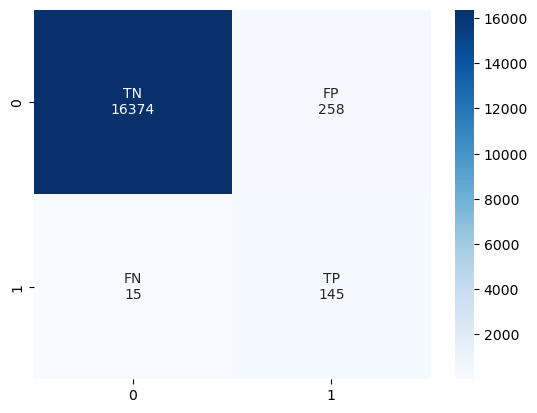

In [18]:
Log_Reg_model = LogisticRegression(C=0.89,tol=0.0999,
                                   n_jobs=-1,
                                   random_state=42)

Log_Reg_model.fit(X_train,y_train)

F1_LR = model_result_pred(Log_Reg_model,X_train,X_test,y_train,y_test)

## SVC

In [19]:
params = {'C':np.random.uniform(0.001,1,5),
          'kernel':['rbf','linear','poly']}

best_param_svc , best_score_svc = hyper_tuning(X_train,y_train,
                                               SVC(),
                                               params,
                                               cv=10,
                                               verbose=2)

print('Best Parameters :',best_param_svc,'with score of:',best_score_svc)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters : {'C': 0.6413435055924107, 'kernel': 'poly'} with score of: 0.9592563191753538


####  Training and Testing

Macro-F1 Score:  0.757788159094716
	Test Confusion Matrix


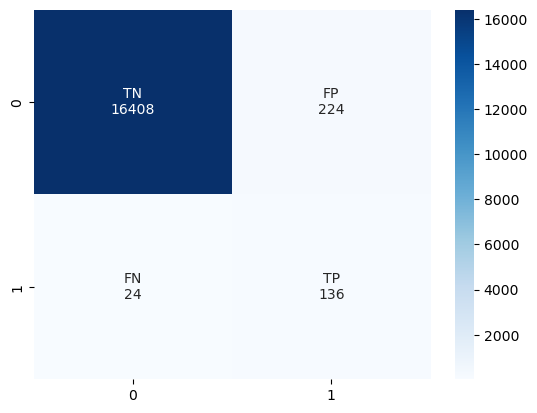

In [22]:
SVC_model = SVC(C=best_param_svc['C'],
               kernel='poly',
               random_state=42)

SVC_model.fit(X_train,y_train)

F1_SVC = model_result_pred(SVC_model,X_train,X_test,y_train,y_test)

## Decision Tree

In [24]:
params = {'max_depth':np.random.randint(10,25,5)}

best_param_dt , best_score_dt = hyper_tuning(X_train,
                                            y_train,
                                            DecisionTreeClassifier(),
                                            params,
                                            cv=11)

print('Best Paeameter :',best_param_dt,'with score of:', best_score_dt)

Fitting 11 folds for each of 5 candidates, totalling 55 fits
Best Paeameter : {'max_depth': 23} with score of: 0.9866249459901199


#### Training and Testing

Macro-F1 Score:  0.7477764705317163
	Test Confusion Matrix


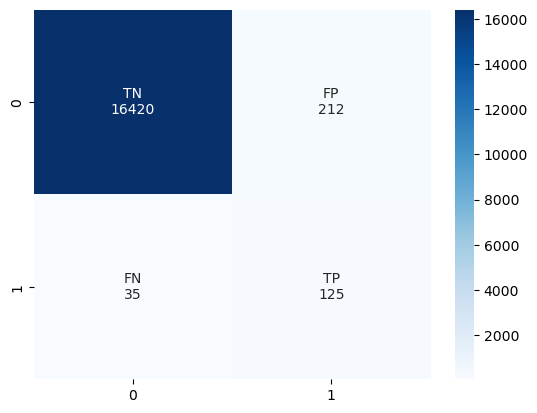

In [25]:
DT_model = DecisionTreeClassifier(max_depth =23)

DT_model.fit(X_train,y_train)

F1_dt = model_result_pred(DT_model,X_train,X_test,y_train,y_test)

## Random Forest

In [29]:
params = {'n_estimators':[300,500,600,650,700],
         'max_depth':[80,110,125,135]}

best_param_rf , best_score_rf = hyper_tuning(X_train,
                                            y_train,
                                            RandomForestClassifier(n_jobs=-1,verbose=1),
                                            params,
                                            cv=7)

print('Best Parameters are:',best_param_rf,'with score of :',best_score_rf)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min


Best Parameters are: {'max_depth': 80, 'n_estimators': 650} with score of : 0.99369055445937


[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:  1.5min finished


#### Training and testing

Macro-F1 Score:  0.8446948039274509
	Test Confusion Matrix


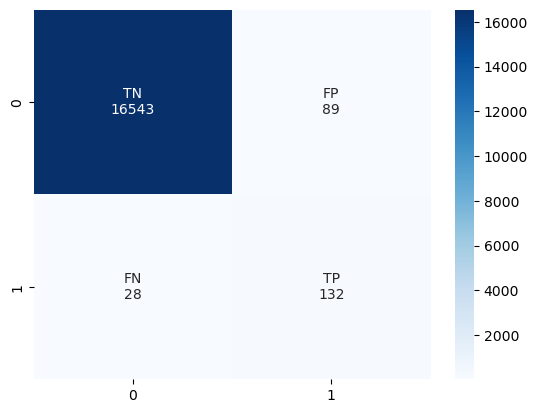

In [31]:
RF_model = RandomForestClassifier(n_estimators = best_param_rf['n_estimators'],
                                 max_depth = best_param_rf['max_depth'],
                                 n_jobs=-1,
                                 verbose=0)

RF_model.fit(X_train,y_train)

F1_rf = model_result_pred(RF_model,X_train,X_test,y_train,y_test)

## Gradient Boosting

In [33]:
params = {'max_depth':[4,6,10,15],
         'learning_rate':[0.001,0.01,0.1,1,10]}

best_param_gb , best_score_gb = hyper_tuning(X_train,
                                            y_train,
                                            GradientBoostingClassifier(random_state=42),
                                            params,
                                            cv=6)

print('Best Parameters:',best_param_gb,'with score :',best_score_gb)

Fitting 6 folds for each of 20 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 1, 'max_depth': 15} with score : 0.9942985291983674


#### Training And Testing

Macro-F1 Score:  0.8296537831688477
	Test Confusion Matrix


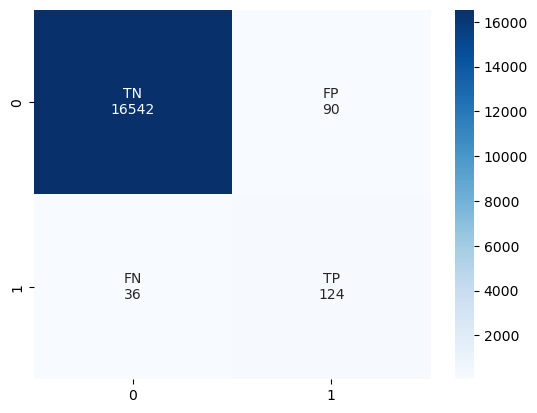

In [35]:
GB_model = GradientBoostingClassifier(max_depth=best_param_gb['max_depth'],
                                     learning_rate=best_param_gb['learning_rate'],
                                     random_state=42)

GB_model.fit(X_train,y_train)

F1_gb = model_result_pred(GB_model,X_train,X_test,y_train,y_test)

## AdaBoost Classifier

In [36]:
params = {'n_estimators':[400,500,600,700,750,800]}

best_param_ab ,best_score_ab = hyper_tuning(X_train,
                                           y_train,
                                           AdaBoostClassifier(random_state=42),
                                           params,
                                           cv=4)

print('Best parameters are: ',best_param_ab,'with score :',best_score_ab)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best parameters are:  {'n_estimators': 800} with score : 0.9933338463898759


#### Training and Testing

Macro-F1 Score:  0.8296482683425277
	Test Confusion Matrix


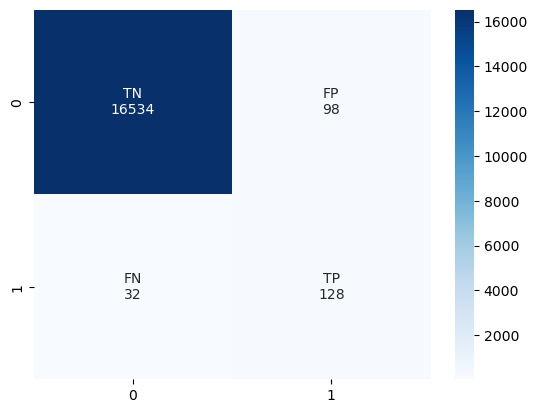

In [40]:
AB_model = AdaBoostClassifier(random_state=42,
                              n_estimators = best_param_ab['n_estimators']) 


# Fit and predict, and obtain train and test scores
AB_model.fit(X_train , y_train)
# Fit and predict, and obtain train and test scores
F1_AB = model_result_pred(AB_model , X_train , X_test , y_train , y_test)

##  XGBoost Classifier

In [45]:
params = {'colsample_bytree':[0.3,0.5,0.8],
         'reg_alpha':[0,0.5,1,5],
         'reg_lambda':[0,0.5,1,5]}

best_param_xgb , best_score_xgb = hyper_tuning(X_train,
                                              y_train,
                                              xgboost.XGBClassifier(n_jobs=-1,random_state=42),
                                              params,
                                              cv = 4
                                              )

print(" Best Parameters:",best_param_xgb,"with score of:",best_score_xgb)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
 Best Parameters: {'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 0} with score of: 0.9951969858633367


#### Training and Testing

Macro-F1 Score:  0.8665630583655588
	Test Confusion Matrix


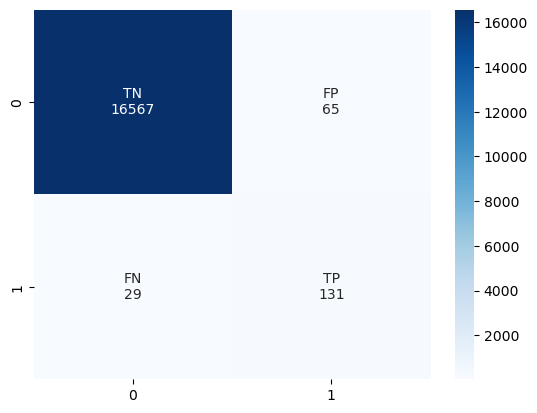

In [49]:
XGB_model = xgboost.XGBClassifier(colsample_bytree=best_param_xgb['colsample_bytree'],
                         reg_alpha=best_param_xgb['reg_alpha'],
                         reg_lambda=best_param_xgb['reg_lambda'],
                         random_state=42
                         ) 



XGB_model.fit(X_train , y_train)

F1_xgb = model_result_pred(XGB_model , X_train , X_test , y_train , y_test)

# Model Scores

In [55]:
table=PrettyTable()

table.field_names = ['Model','Macro-F1 Score']
table.add_row(['Logistic Regression',F1_LR])
table.add_row(['SVC',F1_SVC])
table.add_row(['Decision Trees',F1_dt])
table.add_row(['Random Forest',F1_rf])
table.add_row(['Gradient Boost',F1_gb])
table.add_row(['Ada Boosting',F1_AB])
table.add_row(['XGBooost',F1_xgb])

print(table)

+---------------------+--------------------+
|        Model        |   Macro-F1 Score   |
+---------------------+--------------------+
| Logistic Regression | 0.753415112391743  |
|         SVC         | 0.757788159094716  |
|    Decision Trees   | 0.7477764705317163 |
|    Random Forest    | 0.8446948039274509 |
|    Gradient Boost   | 0.8296537831688477 |
|     Ada Boosting    | 0.8296482683425277 |
|       XGBooost      | 0.8665630583655588 |
+---------------------+--------------------+
